###  **USA REAL ESTATE PRICE PREDICTION** 

## Import Librery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)


## Import Dataset

Download dataset: https://www.kaggle.com/code/mgmarques/houses-prices-complete-solution

In [2]:
df = pd.read_csv('/content/realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


## Data Preprocessing Part 1

In [3]:
# Check the number of unique values for object datatypes

df.select_dtypes(include='object').nunique()

status               2
city               525
state               12
prev_sold_date    3604
dtype: int64

In [4]:
# Check the number of missing value

df.prev_sold_date.isnull().sum()

71255

In [5]:
# Check the number of row and column
df.shape

(100000, 10)

In [6]:
# Drop prev_sold_date because the missing value is around 70 %

df.drop(columns='prev_sold_date', inplace=True)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0


In [7]:
# Drop city because the number of unique value for object datatypes is alot

df.drop(columns='city', inplace=True)
df.head()

,status,bed,bath,acre_lot,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,680.0,NaN,65000.0


## Exploratory Data Analysis

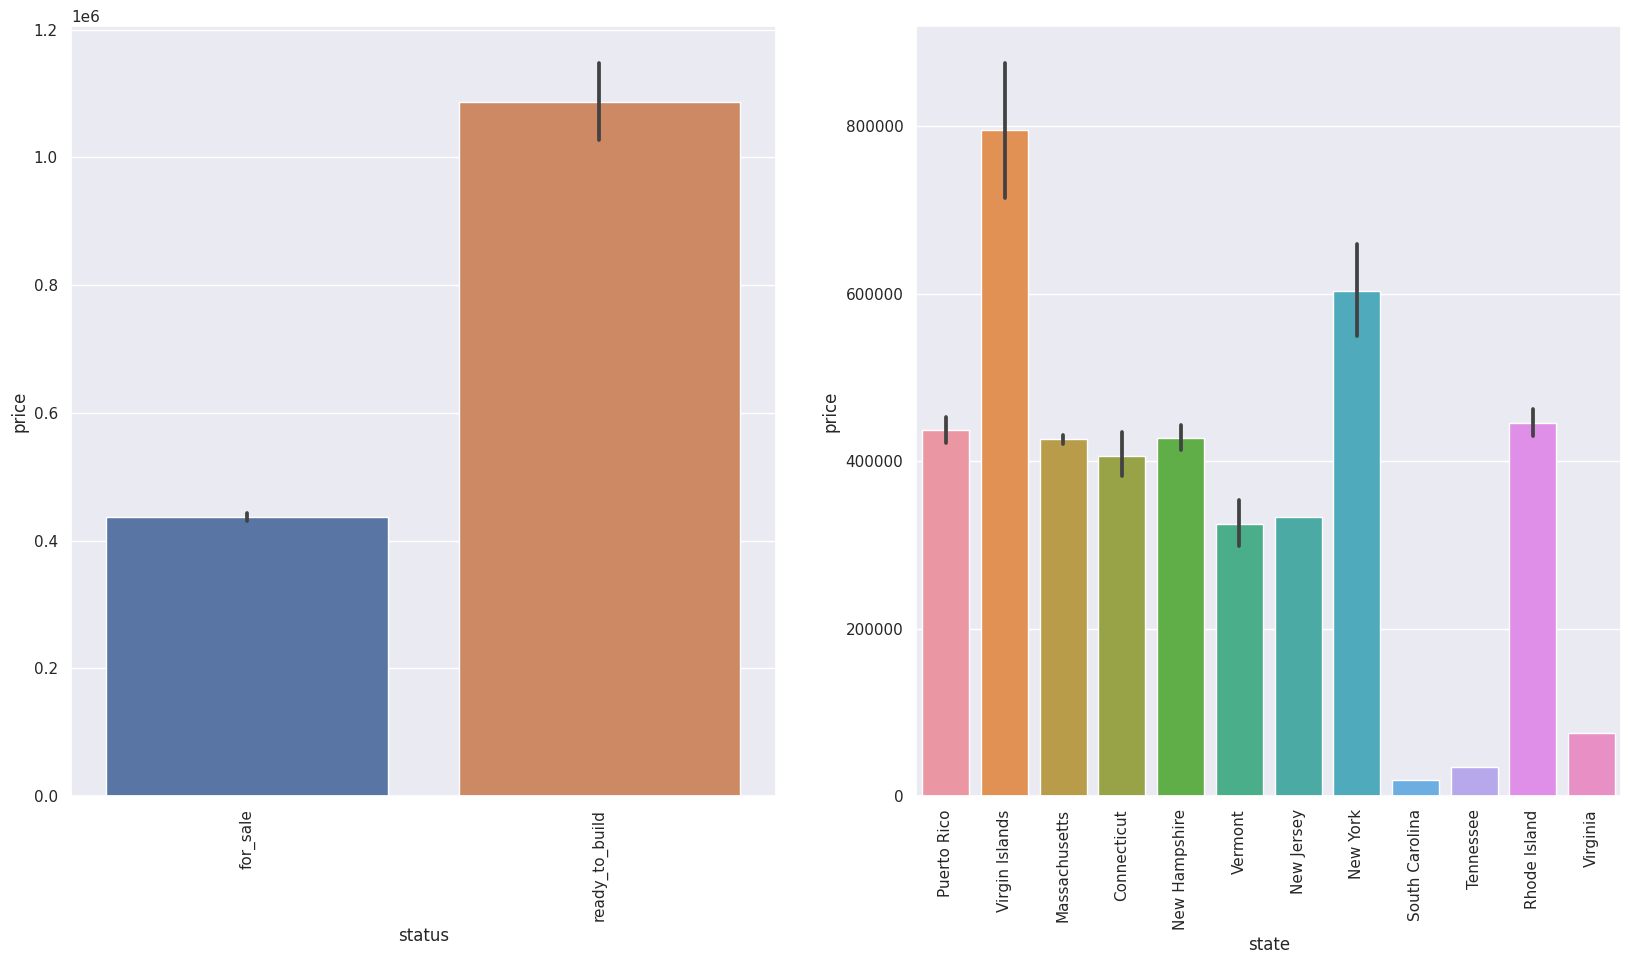

In [8]:
# List of categorical variables to plot

cat_vars = ['status', 'state']

# Create figure with subplots

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axs = axs.flatten()

# Create barplot for each categorical variable

for i, var in enumerate(cat_vars):
  sns.barplot(x=var, y='price', data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout
plt.show()

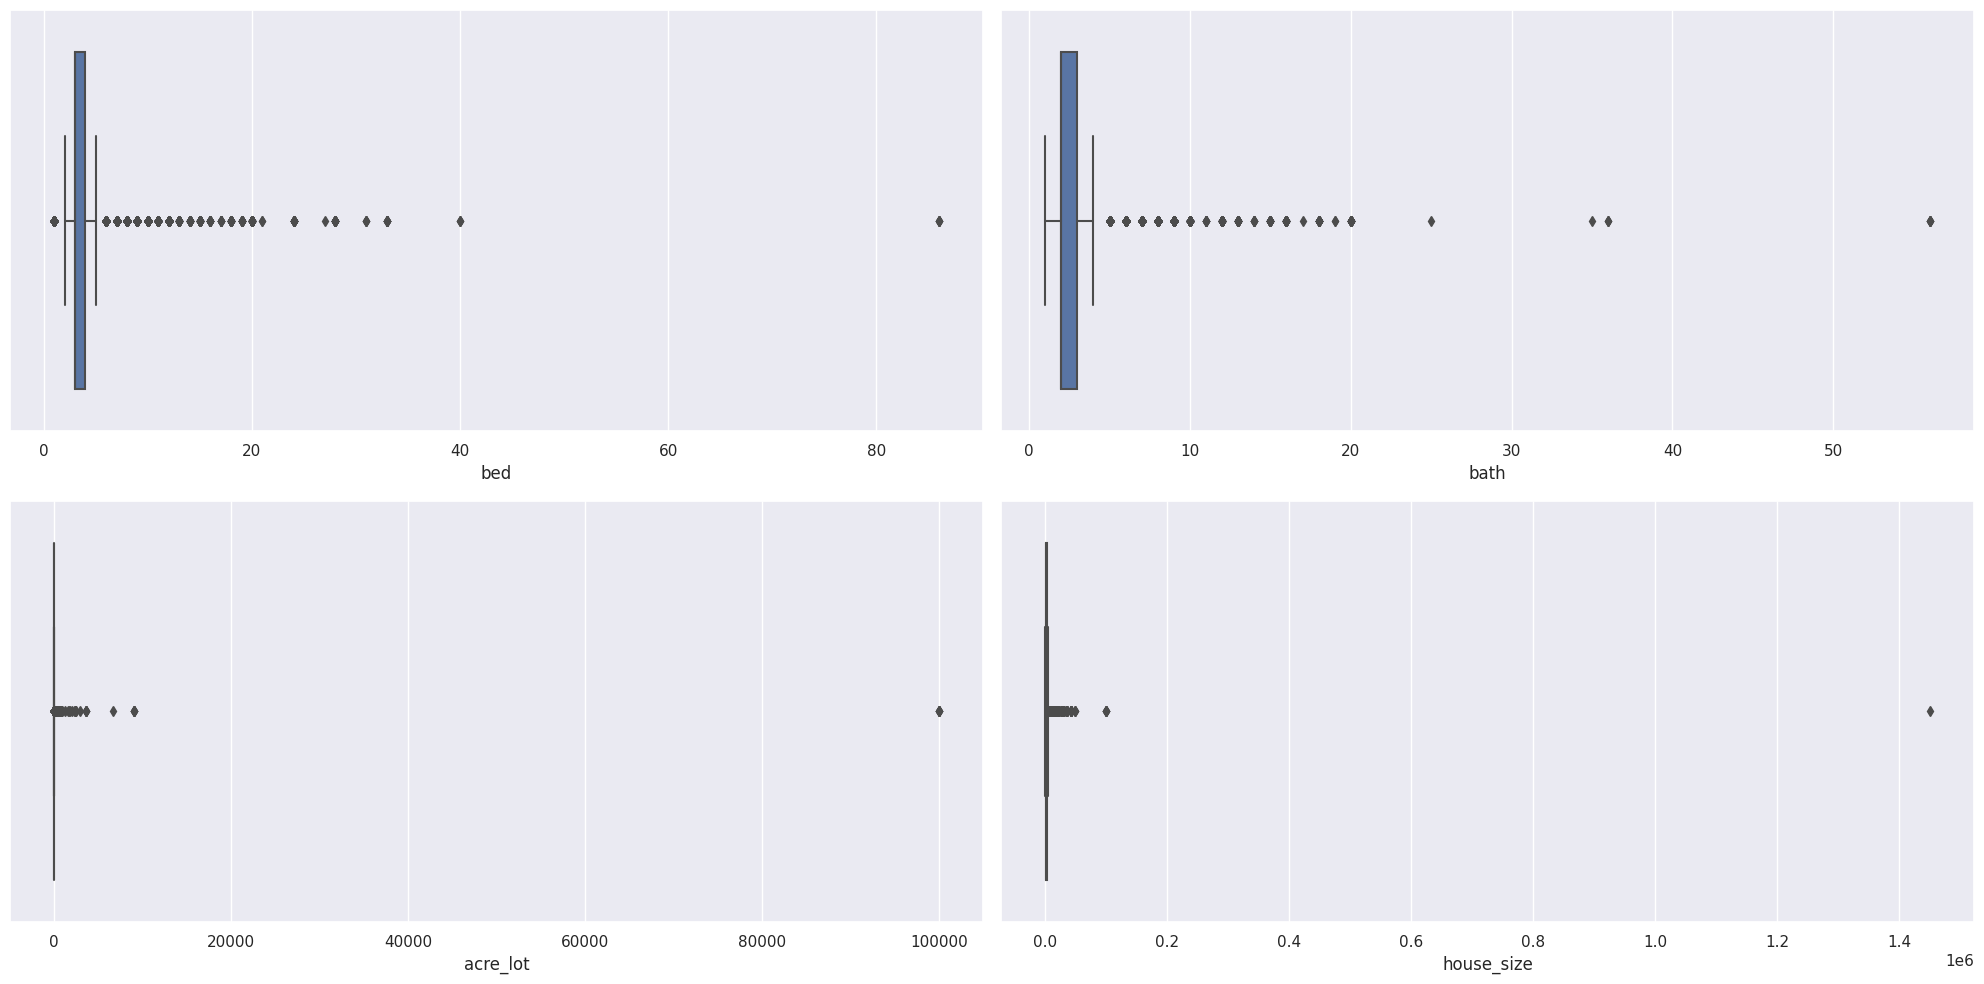

In [9]:
num_vars = ['bed', 'bath', 'acre_lot', 'house_size']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

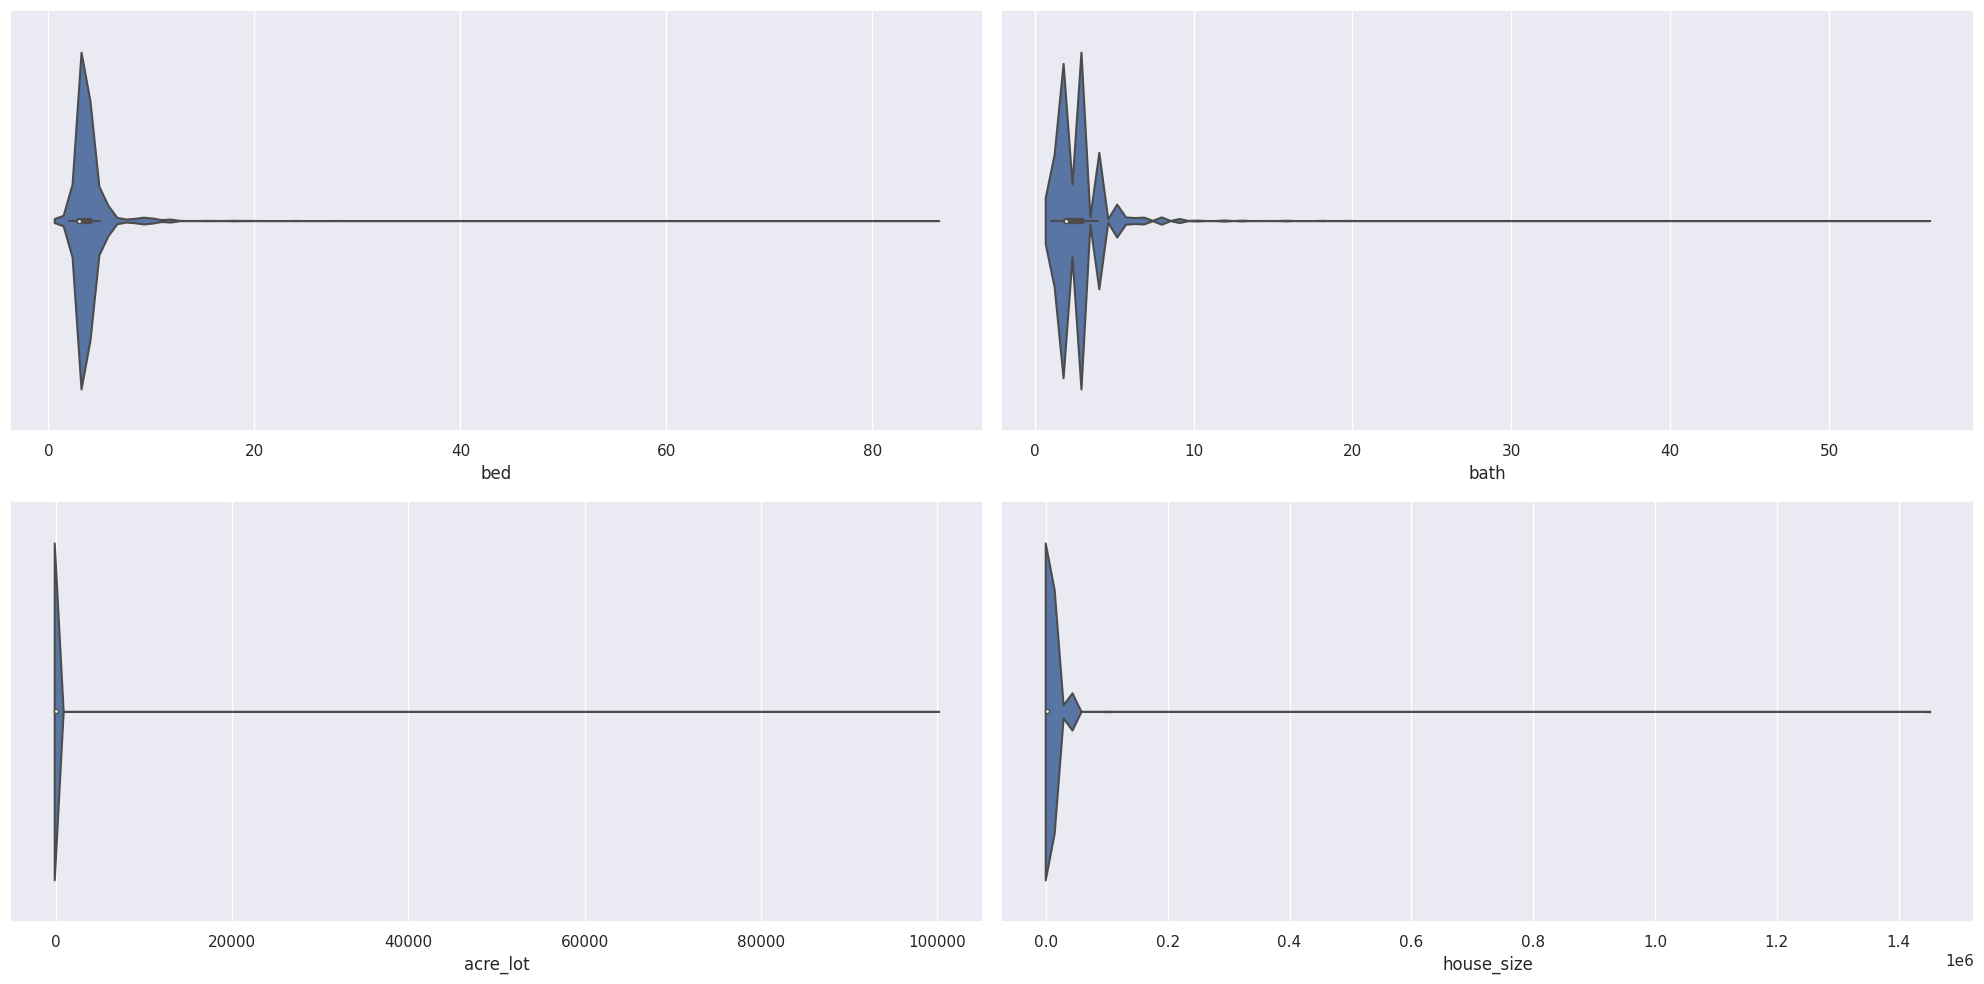

In [10]:
num_vars = ['bed', 'bath', 'acre_lot', 'house_size']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()


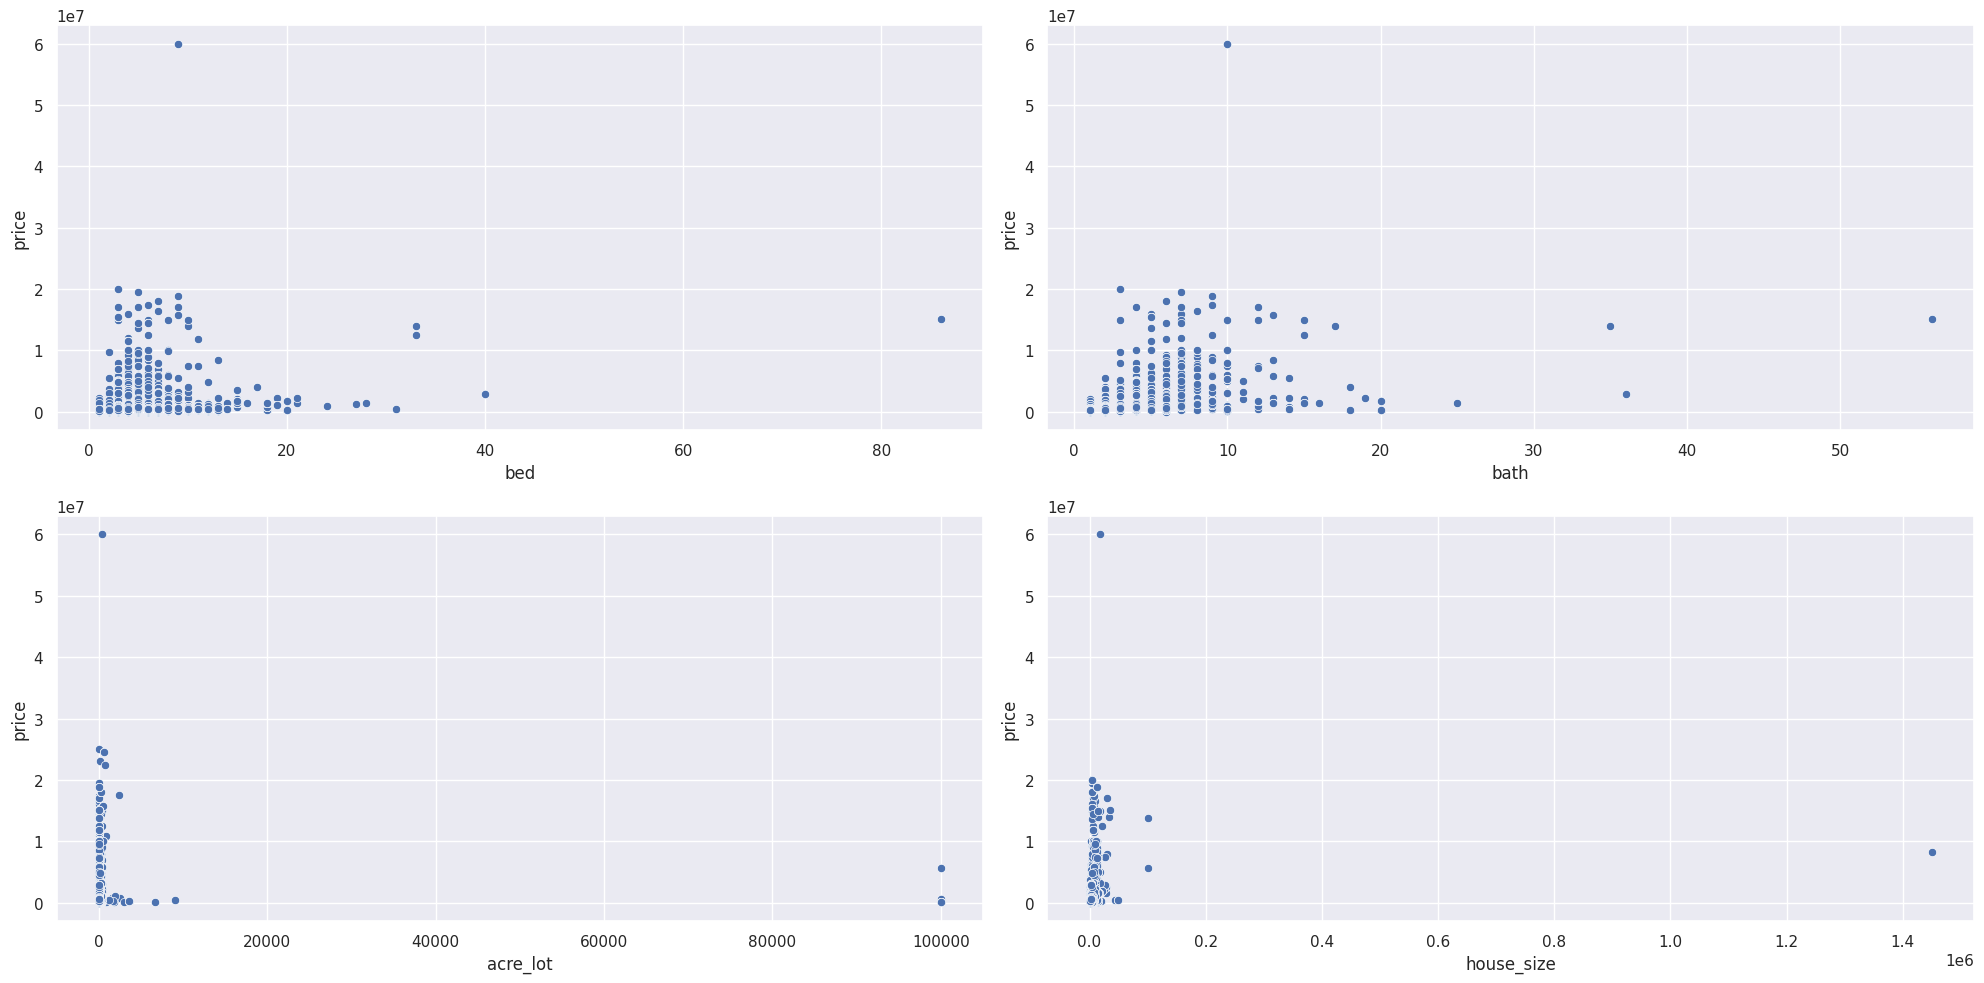

In [11]:
num_vars = ['bed', 'bath', 'acre_lot', 'house_size']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.scatterplot(x=var, y = 'price', data=df, ax=axs[i])

fig.tight_layout()
plt.show()

## Data Preprocessing Part 2

In [12]:
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

bed           24.950
house_size    24.918
bath          24.888
acre_lot      14.013
zip_code       0.195
dtype: float64

In [13]:
df.drop(columns='zip_code', inplace=True)
df.shape

(100000, 7)

In [14]:
# Fill null value with median and mean

df['bed'].fillna(df['bed'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].mean(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mean(), inplace=True)

In [15]:
df.head()

,status,bed,bath,acre_lot,state,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,920.000000,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,1527.000000,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,748.000000,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,1800.000000,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,2180.081737,65000.0


## Label encoding for object datatypes

In [16]:
# Loop over each column in the DataFrame where dtype is 'object'

for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}: {df[col].unique()}')

status: ['for_sale' 'ready_to_build']
state: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia']


In [17]:
from sklearn import preprocessing

# Loop over each column in the DataFram,e where dtype is 'object'

for col in df.select_dtypes(include=['object']).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col] = label_encoder.transform(df[col])

  print(f'{col} : {df[col].unique()}')

status : [0 1]
state : [ 5 10  1  0  2  9  3  4  7  8  6 11]


## Remover Outliers usando IQR

In [18]:
# Print the number of rows before outliers removal

df.shape

(100000, 7)

In [19]:
def remove_outliers_iqr(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  
  return df

  # Specify the columns to remove outliers from

columns_to_check = ['bed', 'bath', 'acre_lot', 'house_size']

# Call the funtion to remove outliers using IQR

df_clean = remove_outliers_iqr(df, columns_to_check)

# Print the resulting dataframe

df_clean.head()

,status,bed,bath,acre_lot,state,house_size,price
0,0,3.0,2.0,0.12,5,920.0,105000.0
1,0,4.0,2.0,0.08,5,1527.0,80000.0
3,0,4.0,2.0,0.10,5,1800.0,145000.0
7,0,3.0,2.0,0.08,5,1050.0,71600.0
10,0,3.0,2.0,13.39,5,1106.0,89000.0


In [ ]:
df_clean.shape

(50558, 7)

## Correlation Heatmap 

<Axes: >

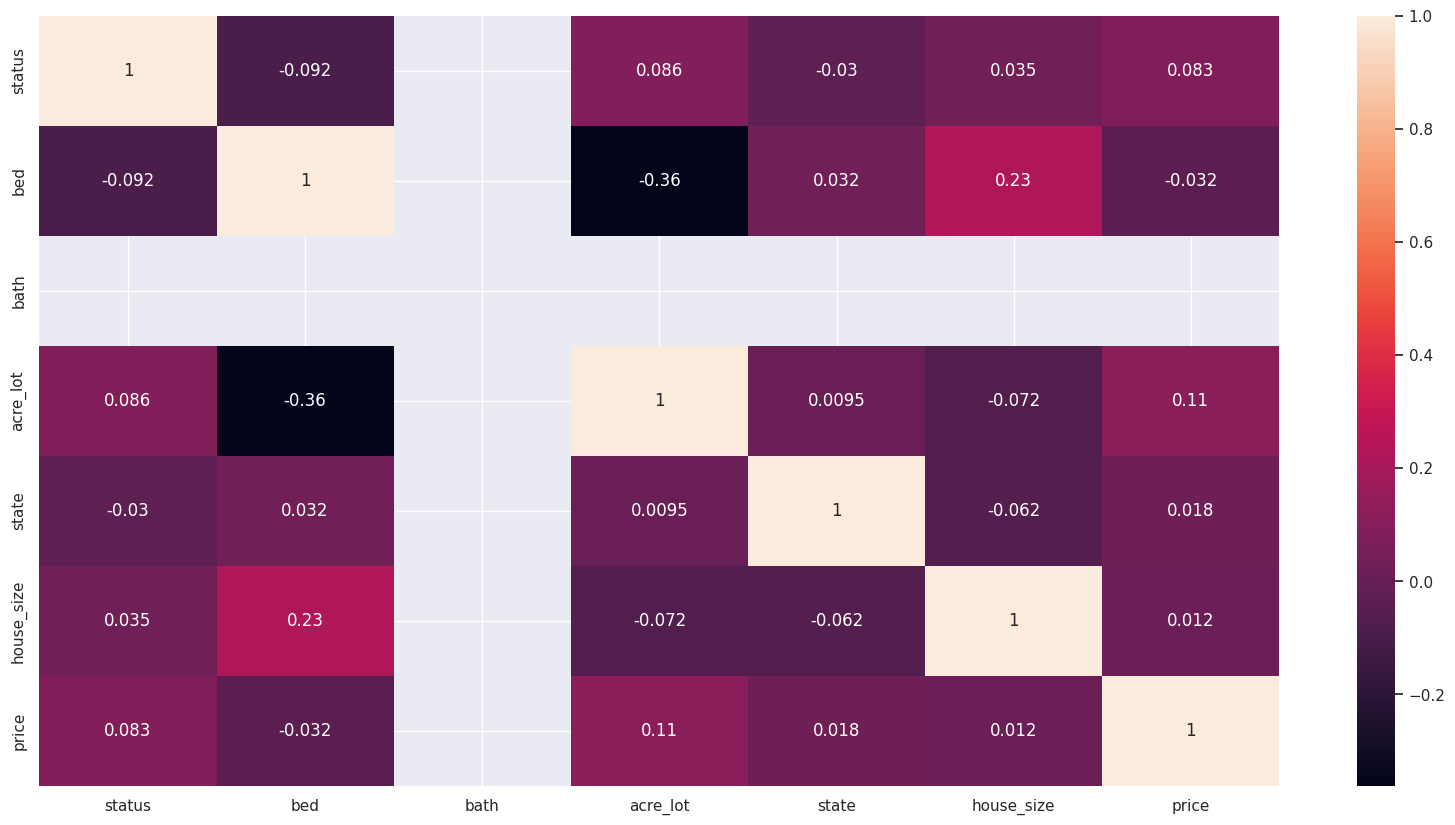

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_clean.corr(method='pearson'), fmt='.2g', annot=True)

In [21]:
df_clean.drop(columns='bath', inplace = True)
df_clean.head()

,status,bed,acre_lot,state,house_size,price
0,0,3.0,0.12,5,920.0,105000.0
1,0,4.0,0.08,5,1527.0,80000.0
3,0,4.0,0.10,5,1800.0,145000.0
7,0,3.0,0.08,5,1050.0,71600.0
10,0,3.0,13.39,5,1106.0,89000.0


## Train test split

In [22]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [23]:
# test size 20 % y train size 80%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [25]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42, max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', random_state=42)

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 99905.67946085877
MAPE is 1.3304384099501423
MSE is 50681781752.41356
R2 score is 0.5766792701837287
RMSE score is 225126.14631004893


In [27]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 29.2 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


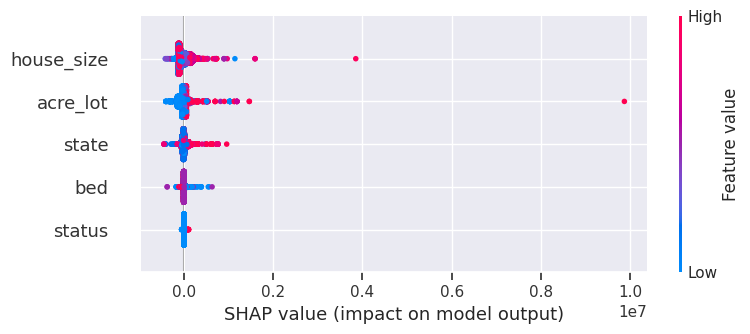

In [28]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

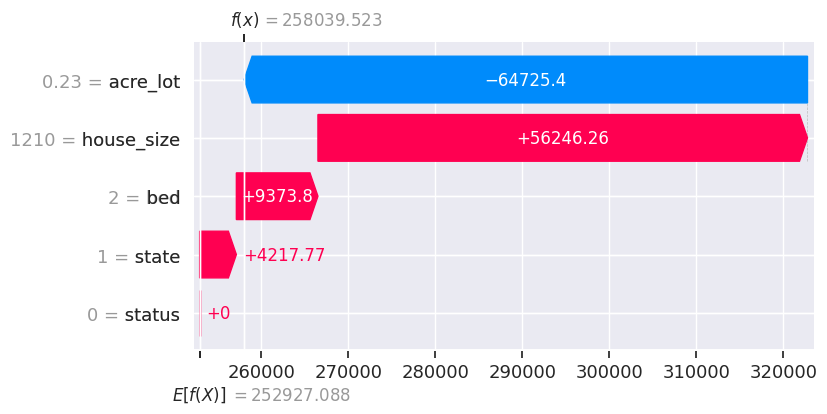

In [29]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

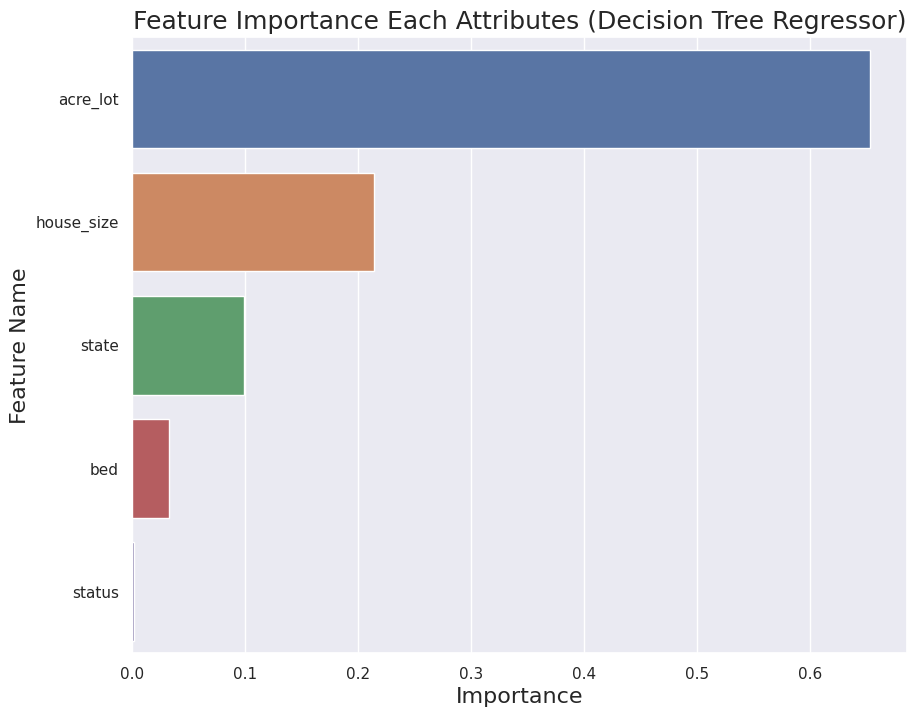

In [30]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

AdaBoost Regresor

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV


# Create an AdaBoost Regressor object
ada = AdaBoostRegressor()

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 1]}

# Create a GridSearchCV object
grid = GridSearchCV(ada, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 50}


In [32]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=100, random_state=0)

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 142898.84136857474
MAPE is 1.7810437954933251
MSE is 88172321437.5971
R2 score is 0.26353868846015893
RMSE score is 296938.24515814247


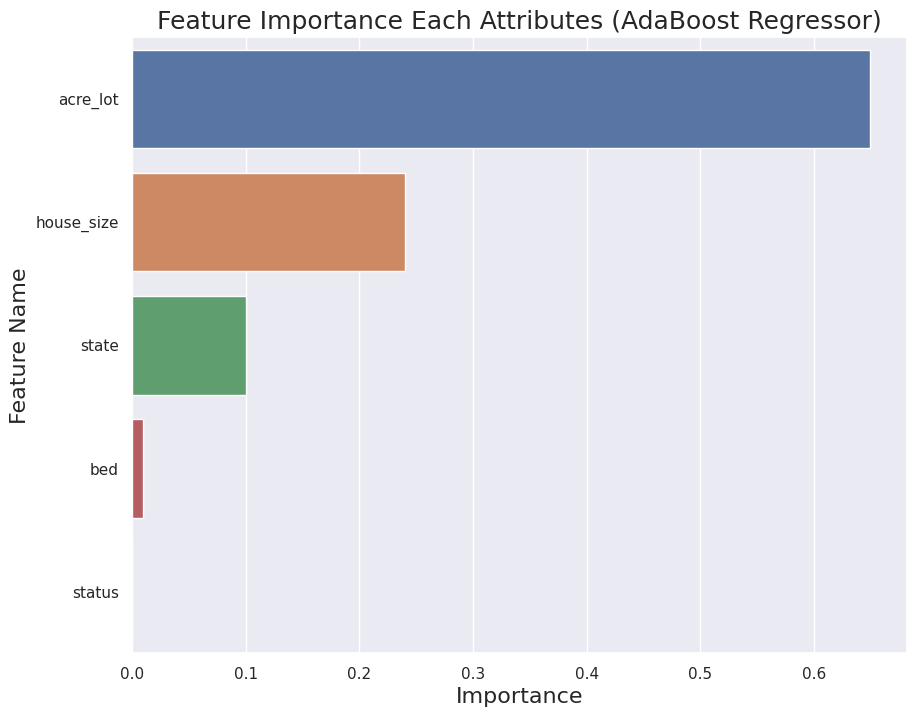

In [34]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()